# Importing Python Modules and Data

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [5]:
# Defining all the categories
categories = ['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

# Training the data on these categories
train = fetch_20newsgroups(subset = 'train', categories = categories)

# Testing the data on these categories
test = fetch_20newsgroups(subset = 'test', categories = categories)

#Printing the training data of 5th article

print(train.data[5])

From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)
Subject: Re: Rewording the Second Amendment (ideas)
Organization: VTT
Lines: 58

In article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:
>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:
>
>> >> The massive destructive power of many modern weapons, makes the
>> >> cost of an accidental or crimial usage of these weapons to great.
>> >> The weapons of mass destruction need to be in the control of
>> >> the government only.  Individual access would result in the
>> >> needless deaths of millions.  This makes the right of the people
>> >> to keep and bear many modern weapons non-existant.

>> >Thanks for stating where you're coming from.  Needless to say, I
>> >disagree 

In [6]:
# Printing the number of all articles
print(len(train.data))

11314


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# so we take the output of weights for words from TfidfVectorizer and pump it to Multinomial NB
# make_pipeline is the way of oganizing how things flow

# Creating the model based on Multinomial Naive Bayes and Training the model with train data

In [ ]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

model.fit(train.data, train.target)

# Creating labels for the test data

In [9]:
labels = model.predict(test.data)

#  Creating confusion matrix and the heat map

Text(92.68,0.5,'Predicted label')

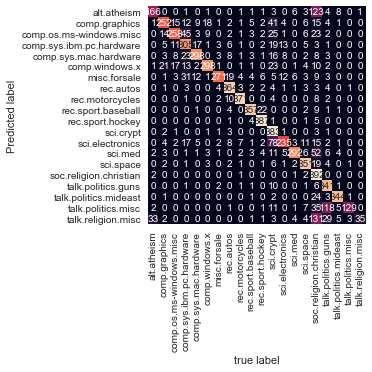

In [12]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat, square = True, annot = True, fmt='d', cbar = False, xticklabels = train.target_names,
            yticklabels = train.target_names)

# Plotting heatmap of the confusion matrix
plt.xlabel('true label')
plt.ylabel('Predicted label')

# Model Evaluation

In [15]:
# Predicting category on new data based on trained model
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names [pred[0]]
# the last line converts the number result to the actua; category name
# s= string, train=train training model, model=model is the pipeline

In [16]:
predict_category('Jesus Christ')

'soc.religion.christian'

In [17]:
predict_category('Christmas')

'alt.atheism'

In [18]:
predict_category('sending load to space station')

'sci.space'

In [21]:
predict_category('BMW is better than Audi')

'rec.autos'